In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualization library for statistical graphics plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


##**1- INFORMATIONS ABOUT DATA**

In [213]:
# load the data
path = r'/content/heart_2020_cleaned.csv'
DataSet = pd.read_csv(path)
DataSet.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [214]:
data_array = DataSet.to_numpy()
print("shape of the data :",data_array.shape)

shape of the data : (319795, 18)


In [215]:
#count empty or null values
DataSet.isnull().sum()
# is missing data (another way)
DataSet.isnull().values.any()

False

In [216]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [217]:
DataSet.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [218]:
DataSet.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#**Features Characterize**



*   **Hear Disease :** Our Target
*  **BMI :** Body mass index is a measure of body fat based on height and weight that applies to adult men and women.

BMI Categories:

Underweight = < 18.5

Normal weight = 18.5 - 24.9

Overweight = 25 - 29.9

Obesity = BMI of 30 or greater



*   **Smoking :** is a major risk factor for cardiovascular disease.

There are 2 types of smoke:

1- Smoker

2- non smoker : econdhand smoke is the smoke breathed out when someone smokes or the smoke that comes from the burning end of a cigarette, cigar, pipe, or other tobacco product.

When smoke from a cigarette is inhaled, the reaction of the cardiovascular system immediately follows:

within one minute, the heart rate begins to rise, increasing by 30% within ten minutes of smoking.

The bad habit also increases blood pressure, fibrinogen, and platelet levels, making blood clots more likely.


*   **Alcohol Drinking :** Alcohol causes not only temporary disturbances in the functioning of the heart but also permanent ones.

*   **Stroke :** Ischemic stroke occurs 4 times more often than hemorrhagic.

*   **Physical Health Days :** How many days in a month did you feel poor?


*   **Mental Health Days :** How many days in a month did you feel poor ?


*   **DiffWalking :** difficulty climbing stairs.



*   **Sex :** gender of a person (Female or Male).
*   **Age Category**


*   **Race Ethnicity**
*   **Diabetic**


*   **Physical Activity :** adults who reported doing physical activity or exercise during the past 30 days other than their regular job.


*   **General Health**

*   **Sleep Hours :** number of hours of sleep.



*   **Asthma :** Asthma causes an inflammatory process in the airways, and
inflammation is a known exacerbator of cardiovascular disease.

*   **Kidney Disease :** When someone has CKD, their heart needs to pump harder to get blood to the kidneys. This can lead to heart disease.

*   **Skin Cancer :** In another study analyzing the SEER registry, 7% of patients with melanoma diagnosed between 1975 and 2015 died of cardiovascular diseases.



In [149]:
DataSet.groupby("HeartDisease")['Sex'].value_counts(normalize=True)*100

HeartDisease  Sex   
No            Female    53.542825
              Male      46.457175
Yes           Male      58.959559
              Female    41.040441
Name: Sex, dtype: float64

In [150]:
DataSet.groupby("Stroke")['Sex'].value_counts(normalize=True)*100

Stroke  Sex   
No      Female    52.442108
        Male      47.557892
Yes     Female    53.252134
        Male      46.747866
Name: Sex, dtype: float64

In [151]:
DataSet.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True)*100

AlcoholDrinking  Sex   
No               Female    52.529377
                 Male      47.470623
Yes              Female    51.696744
                 Male      48.303256
Name: Sex, dtype: float64

In [152]:
DataSet.groupby("BMI")['Sex'].value_counts(normalize=True)*100

BMI    Sex   
12.02  Female     50.0
       Male       50.0
12.08  Male      100.0
12.13  Male      100.0
12.16  Male      100.0
                 ...  
92.53  Female    100.0
93.86  Female    100.0
93.97  Female    100.0
94.66  Female    100.0
94.85  Male      100.0
Name: Sex, Length: 5745, dtype: float64

In [153]:
DataSet.groupby("Smoking")['Sex'].value_counts(normalize=True)*100

Smoking  Sex   
No       Female    56.031551
         Male      43.968449
Yes      Male      52.596507
         Female    47.403493
Name: Sex, dtype: float64

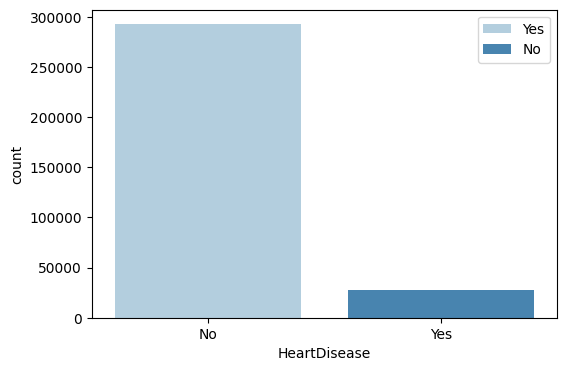

In [194]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'HeartDisease', hue = 'HeartDisease', data = DataSet, palette = 'Blues')
plt.ylabel('count')
plt.legend(['Yes','No'])
plt.show()

In [195]:
DataSet.HeartDisease.value_counts()
No = DataSet.HeartDisease.value_counts()[0]
Yes = DataSet.HeartDisease.value_counts()[1]

print(f"People have Heart Disease: {Yes}, Percentage Value: {(Yes/len(DataSet)*100).round(2)}%")
print(f"People don't have Heart Disease is: {No}, Percentage Value: {(No/len(DataSet)*100).round(2)}%")

People have Heart Disease: 27373, Percentage Value: 8.56%
People don't have Heart Disease is: 292422, Percentage Value: 91.44%


#**2- DATA VISUALIZATION**

In [156]:
def boxplot_drawer(Column_Name):
    sns.boxplot(y=Column_Name,data=DataSet)

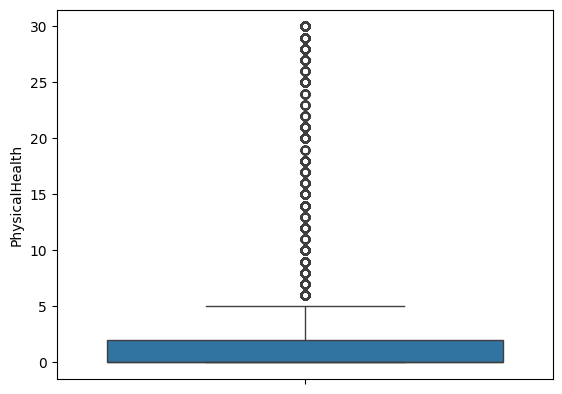

In [157]:
boxplot_drawer("PhysicalHealth")

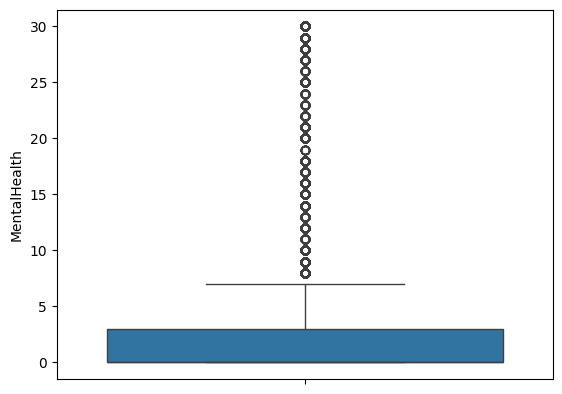

In [158]:
boxplot_drawer("MentalHealth")

In [163]:
def Remove_outliers(Column_Name):
    q1=DataSet[Column_Name].quantile(0.25)
    q3=DataSet[Column_Name].quantile(0.75)
    iqr=q3-q1
    DataSet[Column_Name][(DataSet[Column_Name]<(q1-1.5*iqr))|( DataSet[Column_Name]>(q3+1.5*iqr))]=np.nan
Remove_outliers("PhysicalHealth")

<ipython-input-163-bcaa39c192c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet[Column_Name][(DataSet[Column_Name]<(q1-1.5*iqr))|( DataSet[Column_Name]>(q3+1.5*iqr))]=np.nan


count    226589.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: PhysicalHealth, dtype: float64

In [165]:
DataSet["PhysicalHealth"].describe()

count    226589.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: PhysicalHealth, dtype: float64

In [164]:
Remove_outliers("MentalHealth")

<ipython-input-163-bcaa39c192c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSet[Column_Name][(DataSet[Column_Name]<(q1-1.5*iqr))|( DataSet[Column_Name]>(q3+1.5*iqr))]=np.nan


count    205401.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: MentalHealth, dtype: float64

In [166]:
DataSet["MentalHealth"].describe()

count    205401.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: MentalHealth, dtype: float64

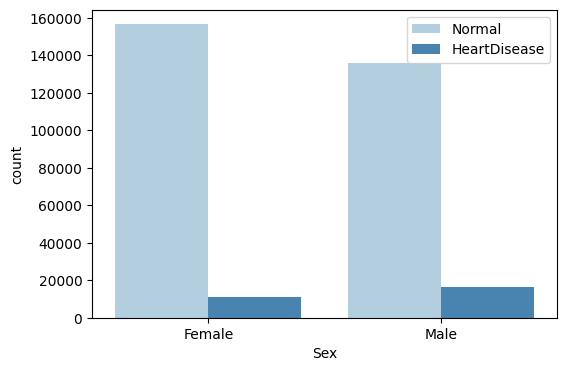

In [167]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Sex', hue = 'HeartDisease', data = DataSet, palette = 'Blues')
plt.ylabel('count')
plt.legend(['Normal','HeartDisease'])
plt.show()
#Most cases of heart disease are men

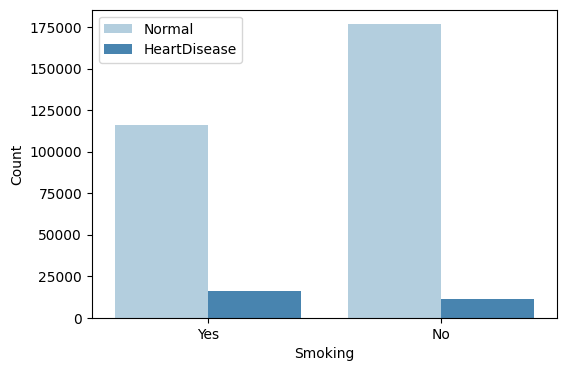

In [168]:
plt.figure(figsize = (6,4))
sns.countplot(x ='Smoking', hue = 'HeartDisease', data = DataSet, palette = 'Blues')
plt.ylabel('Count')
plt.legend(['Normal','HeartDisease'])
plt.show()

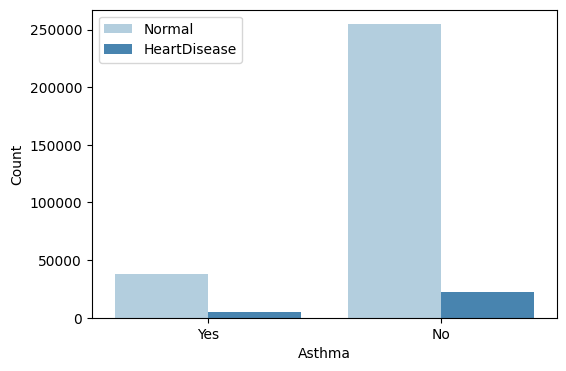

In [169]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Asthma', hue = 'HeartDisease', data = DataSet, palette = 'Blues')
plt.ylabel('Count')
plt.legend(['Normal','HeartDisease'])
plt.show()

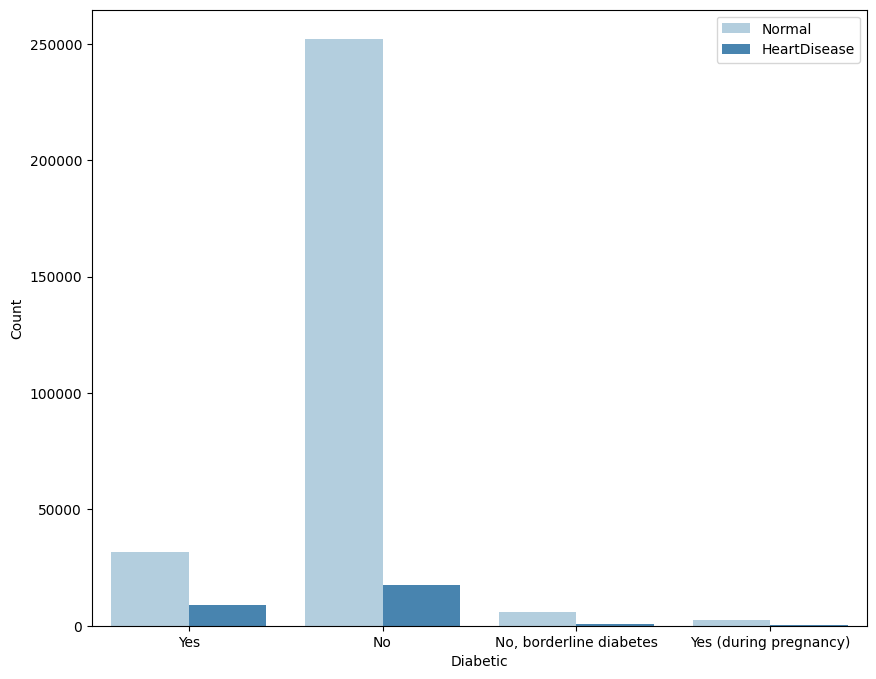

In [170]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'Diabetic', hue = 'HeartDisease', data = DataSet, palette = 'Blues')
plt.ylabel('Count')
plt.legend(['Normal','HeartDisease'])
plt.show()

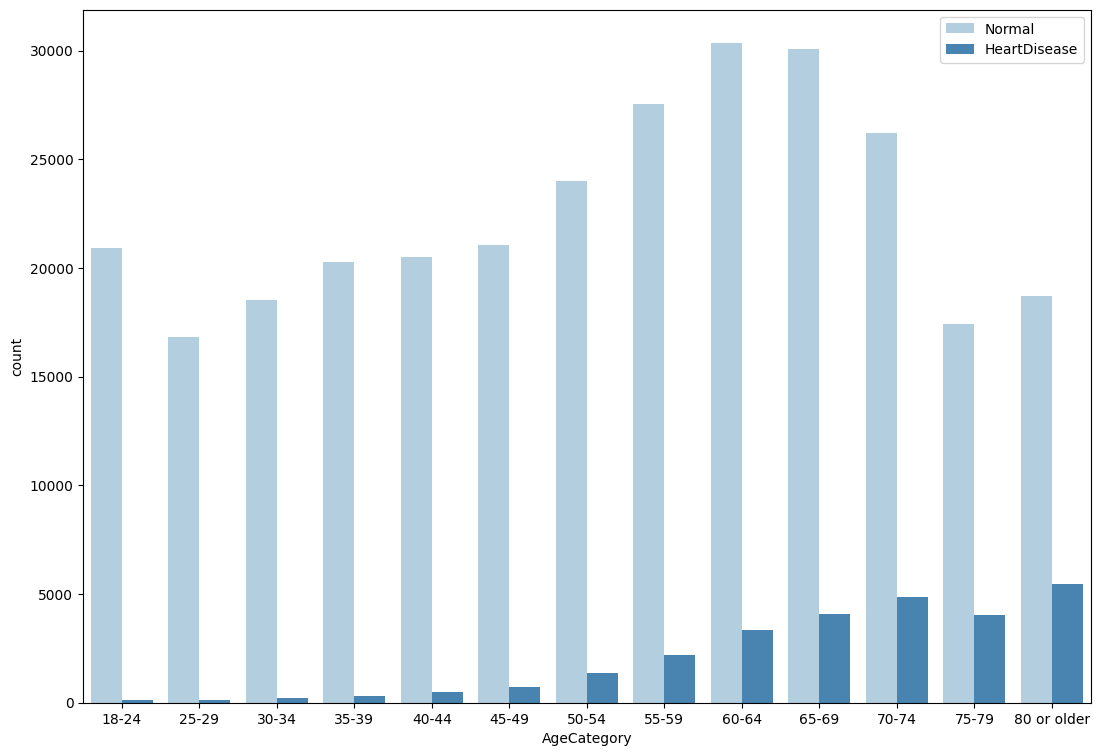

In [171]:
age_order = [
    "18-24",
    "25-29",
    "30-34",
    "35-39",
    "40-44",
    "45-49",
    "50-54",
    "55-59",
    "60-64",
    "65-69",
    "70-74",
    "75-79",
    "80 or older"
]
plt.figure(figsize=(13,9))
sns.countplot(x='AgeCategory', hue= 'HeartDisease', data= DataSet, palette = 'Blues', order=age_order)
plt.legend(['Normal','HeartDisease'])
plt.show()

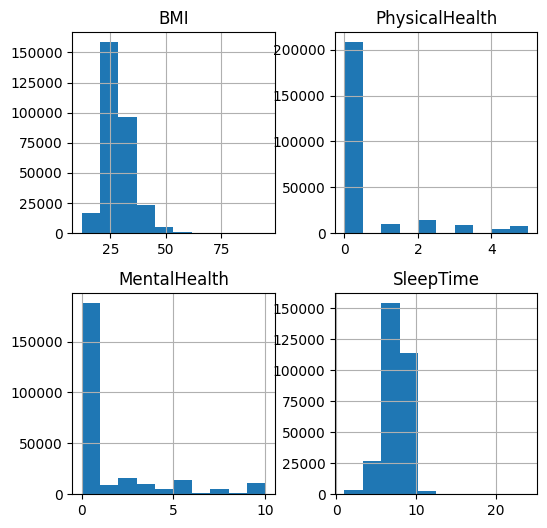

In [104]:
DataSet.hist(figsize=(6,6))
plt.savefig('featuresplot')

##**3- CLEANING DATA**

 Remove duplicated rows before oversampling.

In [219]:
DataSet.duplicated().sum()

18078

In [220]:
new_df = DataSet.drop_duplicates()

In [221]:
new_df.shape

(301717, 18)

Remove Race Column

**Random Over Sampler technique**

Oversampling is a technique used to balance an imbalanced dataset by increasing the number of samples in the minority class.

In [222]:
features = new_df.drop(columns =['HeartDisease'], axis = 1)
target = new_df['HeartDisease']
oversample=RandomOverSampler(sampling_strategy='minority')
x_resamled, y_resampled = oversample.fit_resample(features, target)
y_resampled.value_counts()

No     274456
Yes    274456
Name: HeartDisease, dtype: int64

##**4- Encoding Data**
Converting the data from categorical to numerical data

In [224]:
#get all categorical columns
cat_columns = new_df.select_dtypes(['object']).columns

In [225]:
#convert all categorical columns to numeric
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

<ipython-input-225-4f50f4bb576b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[cat_columns] = new_df[cat_columns].apply(lambda x: pd.factorize(x)[0])


In [226]:
#view the updated data frame
new_df.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,0,0,0,0,0,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,1,0,1,0,0,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,2,0,0,0,1,8.0,0,0,1
3,0,24.21,1,0,0,0.0,0.0,0,0,3,0,1,1,2,6.0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,4,0,1,0,0,8.0,1,0,1
5,1,28.87,0,0,0,6.0,0.0,1,0,3,1,1,1,1,12.0,1,0,1
6,0,21.63,1,0,0,15.0,0.0,0,0,5,0,1,0,1,4.0,0,0,0
7,0,31.64,0,0,0,5.0,0.0,1,0,1,0,0,1,2,9.0,0,0,1
8,0,26.45,1,0,0,0.0,0.0,0,0,1,0,2,1,1,5.0,1,1,1
9,0,40.69,1,0,0,0.0,0.0,1,1,2,0,1,0,2,10.0,1,0,1


<Axes: >

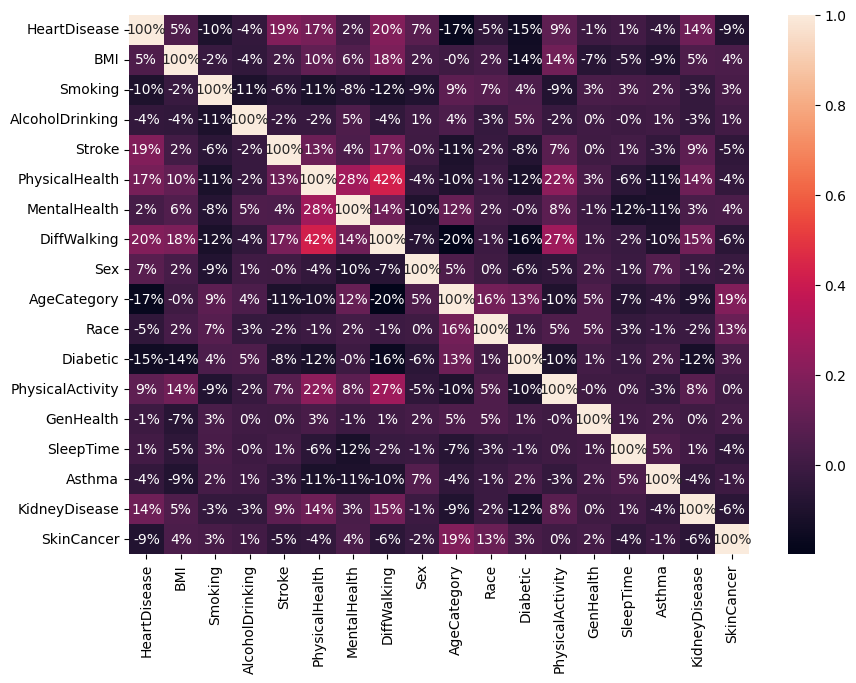

In [227]:
# the correlation of the columns
# visulize the data
plt.figure(figsize=(10,7))
sns.heatmap(new_df.corr(),annot=True, fmt='.0%')

#**4- SPLIT AND PREPARING THE DATA**

In [228]:
# Separate the features (X) and the target (y)
X = new_df.iloc[ : ,1 : ] #Target -> features
y = new_df.iloc[ : , 0 ]  # label

In [229]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,0,0,0,3.0,30.0,0,0,0,0,0,0,0,5.0,0,0,0
1,20.34,1,0,1,0.0,0.0,0,0,1,0,1,0,0,7.0,1,0,1
2,26.58,0,0,0,20.0,30.0,0,1,2,0,0,0,1,8.0,0,0,1
3,24.21,1,0,0,0.0,0.0,0,0,3,0,1,1,2,6.0,1,0,0
4,23.71,1,0,0,28.0,0.0,1,0,4,0,1,0,0,8.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,0,0,0,7.0,0.0,1,1,6,5,0,1,1,6.0,0,0,1
319791,29.84,0,0,0,0.0,0.0,0,1,10,5,1,0,0,5.0,0,0,1
319792,24.24,1,0,0,0.0,0.0,0,0,8,5,1,0,2,6.0,1,0,1
319793,32.81,1,0,0,0.0,0.0,0,0,12,5,1,1,2,12.0,1,0,1


In [230]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int64

In [231]:
# split the data into 20% testing data and 80% training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# Print the shapes of the subsets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(241373, 17) (60344, 17) (241373,) (60344,)


In [233]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#**5- ML Model**



#**KNeighbors Classifier**




In [234]:
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier()

KNNclassifier.fit(X_train, y_train)
Y_pred = KNNclassifier.predict(X_test)

trainscore = KNNclassifier.score(X_train, y_train)
print('Training Score:', trainscore)

testscore = KNNclassifier.score(X_test, y_test)
print('Testing Score:', testscore)

output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())

from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Training Score: 0.9201194831236302
Testing Score: 0.8980511732732335
   Predicted
0          0
1          0
2          0
3          0
4          0
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54894
           1       0.32      0.12      0.17      5450

    accuracy                           0.90     60344
   macro avg       0.62      0.55      0.56     60344
weighted avg       0.86      0.90      0.88     60344



**Confusion Matrix**

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

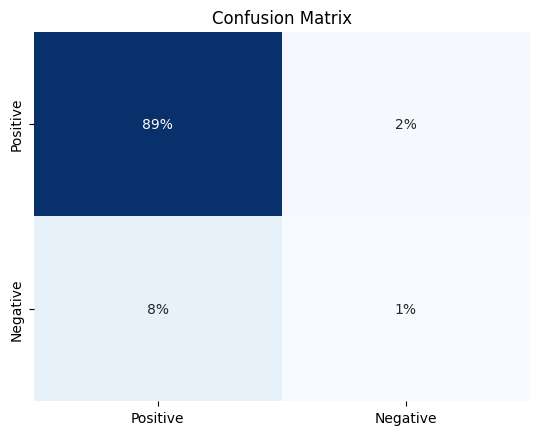

In [235]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

CMatrix= confusion_matrix(y_test,Y_pred)
sns.heatmap(CMatrix/np.sum(CMatrix), annot=True,
            fmt='.0%', cmap='Blues',cbar=False)#annot=True to annotate cells

plt.title('Confusion Matrix')

ax= plt.subplot()
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'])

##**Logistic Regression**

In [236]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

LogisticRegressionModel = LogisticRegression()

LogisticRegressionModel.fit(X_train, y_train)
Y_pred = LogisticRegressionModel.predict(X_test)

#training score
trainscore = LogisticRegressionModel.score(X_train, y_train)
print('Training Score:', trainscore)

trainscore = LogisticRegressionModel.score(X_test, y_test)
print('Training Score:', trainscore)

output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, Y_pred))

Training Score: 0.9103337987264524
Training Score: 0.9094524724910513
   Predicted
0          0
1          0
2          0
3          0
4          0
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54894
           1       0.49      0.08      0.13      5450

    accuracy                           0.91     60344
   macro avg       0.70      0.53      0.54     60344
weighted avg       0.88      0.91      0.88     60344



**Confusion Matrix**

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

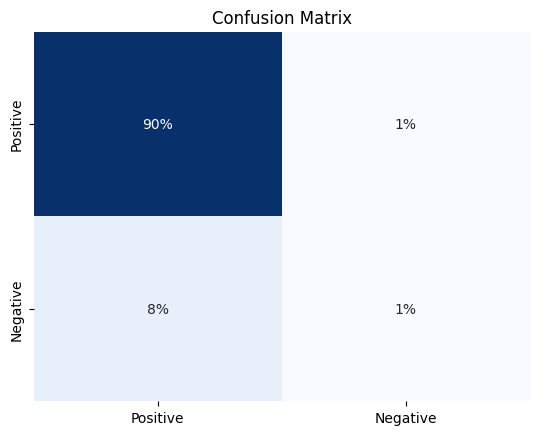

In [238]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

CMatrix= confusion_matrix(y_test,Y_pred)
sns.heatmap(CMatrix/np.sum(CMatrix), annot=True,
            fmt='.0%', cmap='Blues',cbar=False)#annot=True to annotate cells

plt.title('Confusion Matrix')

ax= plt.subplot()
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'])

##**Decision Tree Classifier**

In [239]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

DT_model.fit(X_train, y_train)
Y_pred = DT_model.predict(X_test)

#training score
trainscore = DT_model.score(X_train, y_train)
print('Training Score:', trainscore)

trainscore = DT_model.score(X_test, y_test)
print('Training Score:', trainscore)

output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, Y_pred))

Training Score: 0.9971164960455394
Training Score: 0.8550808696804985
   Predicted
0          0
1          0
2          0
3          0
4          0
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     54894
           1       0.23      0.25      0.24      5450

    accuracy                           0.86     60344
   macro avg       0.58      0.58      0.58     60344
weighted avg       0.86      0.86      0.86     60344



**Confusion Matrix**

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

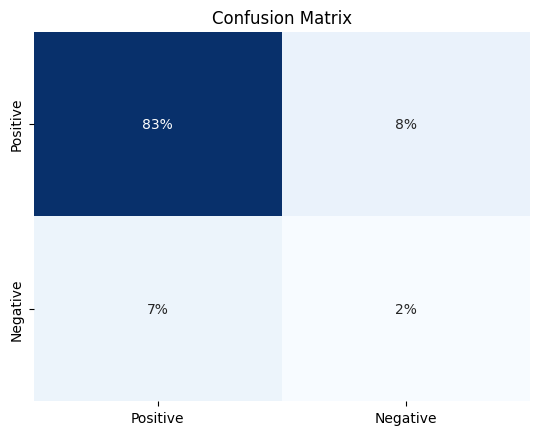

In [240]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

CMatrix= confusion_matrix(y_test,Y_pred)
sns.heatmap(CMatrix/np.sum(CMatrix), annot=True,
            fmt='.0%', cmap='Blues',cbar=False)#annot=True to annotate cells

plt.title('Confusion Matrix')

ax= plt.subplot()
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'])